In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import sklearn.model_selection as mod
import sklearn.neighbors as nei
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import operator
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [32]:
!pip install mlxtend


In [33]:
!pip install missingno


In [6]:
!pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 9.9 MB/s eta 0:00:00


In [34]:
df = pd.read_csv('diabetes.csv')


In [35]:
df.head();

In [36]:
df.shape

(768, 9)

In [37]:
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
df.duplicated().sum()


0

In [42]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
df_copy = df.copy(deep = True)


In [44]:


df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] =df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df_copy.isnull().sum()


df['Outcome'].value_counts()

df.groupby('Outcome').mean()

df1=df_copy
df1['Glucose'].fillna(df1['Glucose'].mean(), inplace = True)

df1['BloodPressure'].fillna(df1['BloodPressure'].mean(), inplace = True)

df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace = True)

df1['Insulin'].fillna(df1['Insulin'].median(), inplace = True)

df1['BMI'].fillna(df1['BMI'].median(), inplace = True)

df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

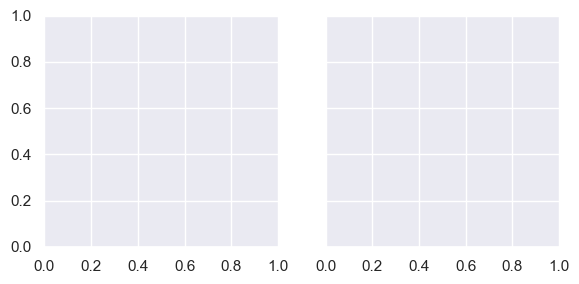

In [45]:
age=sns.FacetGrid(df1,col='Outcome')


In [46]:
df1.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

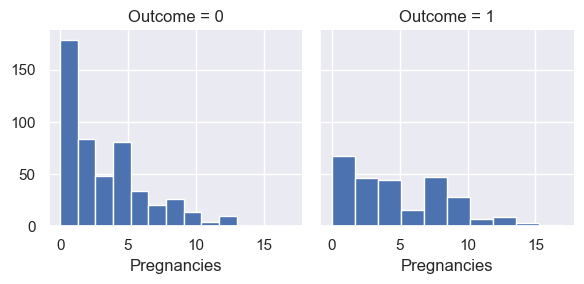

In [47]:
Pregnancies=sns.FacetGrid(df1,col='Outcome')
Pregnancies.map(plt.hist,'Pregnancies')
Pregnancies

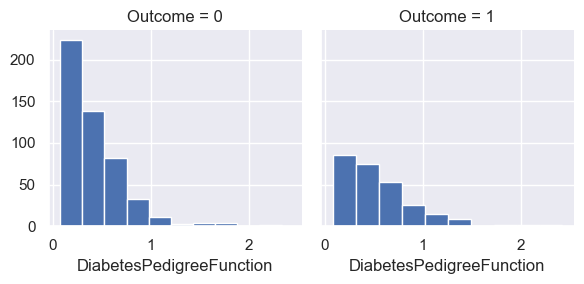

In [48]:
DiabetesPedigreeFunction=sns.FacetGrid(df1,col='Outcome')
DiabetesPedigreeFunction.map(plt.hist,'DiabetesPedigreeFunction')

In [50]:
Nutritional_status = pd.Series([])

for i in range(len(df1)):
    if df1['BMI'][i] == 0.0:
        Nutritional_status[i]="NA"

    elif df1['BMI'][i] < 18.5:
        Nutritional_status[i]="Underweight"

    elif df1['BMI'][i] < 25:
        Nutritional_status[i]="Normal"

    elif df1['BMI'][i] >= 25 and df1['BMI'][i] < 30:
        Nutritional_status[i]="Overweight"

    elif df1['BMI'][i] >= 30:
        Nutritional_status[i]="Obese"

    else:
        Nutritional_status[i]= df1['BMI'][i]

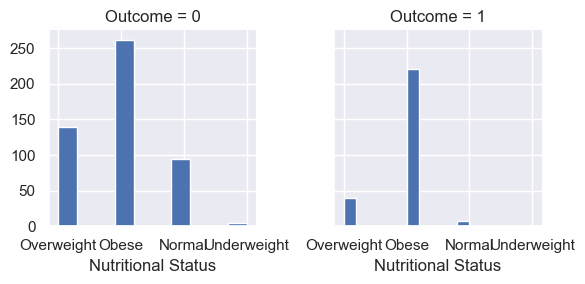

In [51]:
df1.insert(6, "Nutritional Status", Nutritional_status)
df1.head();
df1['Nutritional Status'].value_counts()

NutritionalStatus=sns.FacetGrid(df1,col='Outcome')
NutritionalStatus.map(plt.hist,'Nutritional Status')
OGTT = pd.Series([])

for i in range(len(df1)):
    if df1['Glucose'][i] == 0.0:
        OGTT [i]="NA"

    elif df1['Glucose'][i] <= 140:
        OGTT [i]="Normal"

    elif df1['Glucose'][i] > 140 and df1['Glucose'][i] <= 198:
        OGTT [i]="Impaired Glucose Tolerance"

    elif df1['Glucose'][i] > 198:
        OGTT [i]="Diabetic Level"

    else:
        OGTT [i]= df1['Glucose'][i]


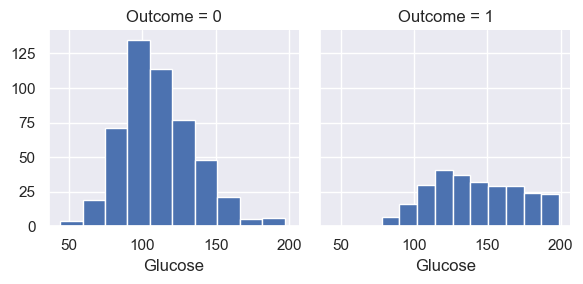

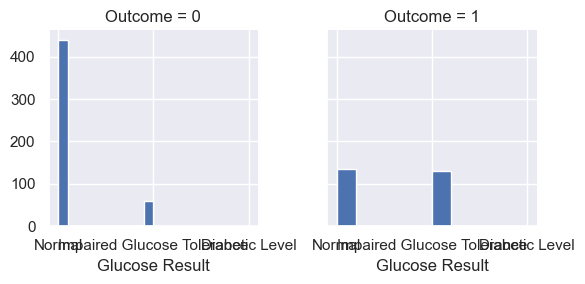

In [52]:
df1.insert(2, "Glucose Result", OGTT)
df1['Glucose Result'].value_counts()
Impaired_Glucose_Tolerance_Diabetic = ((df1 ['Glucose'] > 140 ) & (df1 ['Glucose'] <= 198) & (df1 ['Outcome'] == 1)).sum()
Impaired_Glucose_Tolerance_Diabetic

Normal_Glucose_Diabetic = ((df1 ['Glucose'] != 0 ) & (df1 ['Glucose'] <= 140) & (df1 ['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

Glucose=sns.FacetGrid(df1,col='Outcome')
Glucose.map(plt.hist,'Glucose')

GlucoseResult=sns.FacetGrid(df1,col='Outcome')
GlucoseResult.map(plt.hist,'Glucose Result')

Percentile_skin_thickness = pd.Series([])
df1['Age'].value_counts()

for i in range(len(df1)):


    if df1["Age"][i] >= 20.0 and df1["Age"][i] <= 79.0:

        if df1["SkinThickness"][i] == 0.0:
            Percentile_skin_thickness[i]=" 0 NA"

        elif df1["SkinThickness"][i] < 11.9:
            Percentile_skin_thickness[i]="1 <P5th"

        elif df1["SkinThickness"][i] == 11.9:
            Percentile_skin_thickness[i]="2 P5th"

        elif df1["SkinThickness"][i] > 11.9 and df1["SkinThickness"][i] < 14.0:
            Percentile_skin_thickness[i]="3 P5th - P10th"

        elif df1["SkinThickness"][i] == 14.0:
            Percentile_skin_thickness[i]="4 P10th"
        elif df1["SkinThickness"][i] > 14.0 and  df1["SkinThickness"][i] < 15.8:
            Percentile_skin_thickness[i]="5 P10th - P15th"

        elif df1["SkinThickness"][i] == 15.8:
            Percentile_skin_thickness[i]="6 P15th"

        elif df1["SkinThickness"][i] > 15.8 and df1["SkinThickness"][i] < 18.0:
            Percentile_skin_thickness[i]="7 P15th - P25th"

        elif df1["SkinThickness"][i] == 18.0:
            Percentile_skin_thickness[i]="8 P25th"

        elif df1["SkinThickness"][i] > 18.0 and df1["SkinThickness"][i] < 23.5:
            Percentile_skin_thickness[i]="9 P25th - P50th"

        elif df1["SkinThickness"][i] == 23.5:
            Percentile_skin_thickness[i]="10 P50th"

        elif df1["SkinThickness"][i] > 23.5 and df1["SkinThickness"][i] < 29.0:
            Percentile_skin_thickness[i]="11 P50th - P75th"

        elif df1["SkinThickness"][i] == 29.0:
            Percentile_skin_thickness[i]="12 P75th"

        elif df1["SkinThickness"][i] > 29.0 and df1["SkinThickness"][i] < 31.9:
            Percentile_skin_thickness[i]="13 P75th - P85th"

        elif df1["SkinThickness"][i] == 31.9:
            Percentile_skin_thickness[i]="14 P85th"

        elif df1["SkinThickness"][i] > 31.9 and df1["SkinThickness"][i] < 33.7:
            Percentile_skin_thickness[i]="15 P85th - P90th"
        elif df1["SkinThickness"][i] == 33.7:
            Percentile_skin_thickness[i]="16 P90th"

        elif df1["SkinThickness"][i] > 33.7 and df1["SkinThickness"][i] < 35.9:
            Percentile_skin_thickness[i]="17 P90th - P95th"

        elif df1["SkinThickness"][i] == 35.9:
            Percentile_skin_thickness[i]="18 P95th"

        elif df1["SkinThickness"][i] > 35.9:
            Percentile_skin_thickness[i]="19 >P95th"
    elif df1["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  df1["SkinThickness"][i] > 31.7:
            Percentile_skin_thickness[i]="20 >P95th"


df1.insert(4, "Percentile skin thickness", Percentile_skin_thickness)

df1.head(5);


In [53]:
df1['Percentile skin thickness'].value_counts()


diabetic_malnourished_st = ((df1 ['SkinThickness'] < 15.8) & (df1 ['Outcome'] == 1)).sum()
print(df1)
diabetic_malnourished_st

diabetic_malnourished_st.mean()

     Pregnancies  Glucose              Glucose Result  BloodPressure  \
0              6    148.0  Impaired Glucose Tolerance           72.0   
1              1     85.0                      Normal           66.0   
2              8    183.0  Impaired Glucose Tolerance           64.0   
3              1     89.0                      Normal           66.0   
4              0    137.0                      Normal           40.0   
..           ...      ...                         ...            ...   
763           10    101.0                      Normal           76.0   
764            2    122.0                      Normal           70.0   
765            5    121.0                      Normal           72.0   
766            1    126.0                      Normal           60.0   
767            1     93.0                      Normal           70.0   

    Percentile skin thickness  SkinThickness  Insulin   BMI  \
0            17 P90th - P95th           35.0    125.0  33.6   
1        

6.0

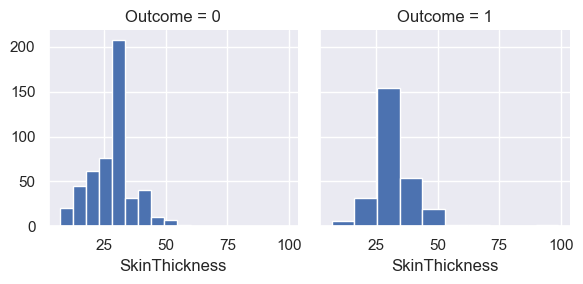

In [54]:
SkinThickness=sns.FacetGrid(df1,col='Outcome')
SkinThickness.map(plt.hist,'SkinThickness')

In [55]:
df1['BloodPressure'].mean()

df1['BloodPressure'].min()

df1['BloodPressure'].max()


122.0

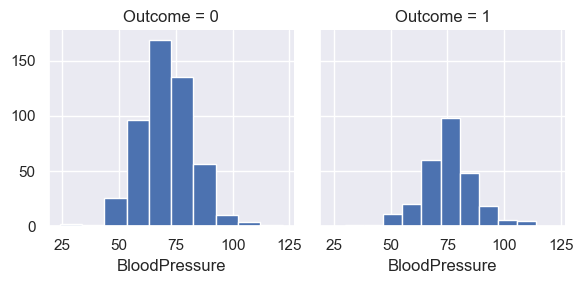

In [56]:
BloodPressure=sns.FacetGrid(df1,col='Outcome')
BloodPressure.map(plt.hist,'BloodPressure')

In [57]:
df1['Insulin'].mean()

140.671875

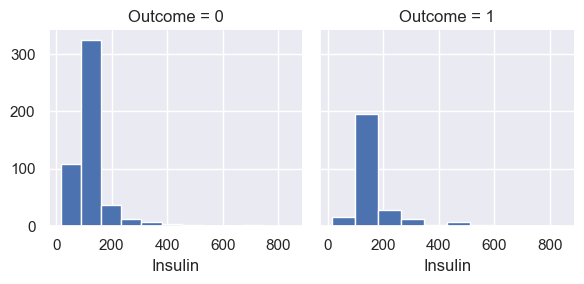

In [58]:
Insulin=sns.FacetGrid(df1,col='Outcome')
Insulin.map(plt.hist,'Insulin')

In [59]:
df1['BMI'].mean()

32.4552083333333

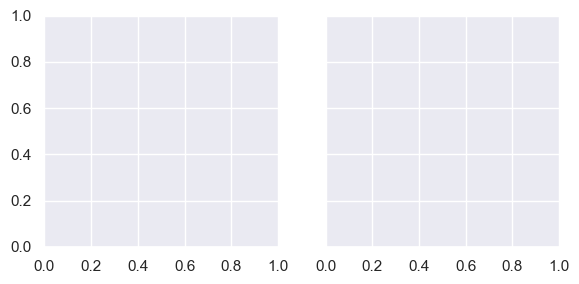

In [60]:
BMI=sns.FacetGrid(df1,col='Outcome')

In [62]:
#Skew of attributes distributions
# Select only numeric columns
numeric_df = df1.select_dtypes(include=[np.number])

In [63]:
skew = numeric_df.skew(axis=1)

In [64]:
encoded_columns = pd.get_dummies(df1[['Glucose Result', 'Nutritional Status']])
df1_encoded = pd.concat([numeric_df, encoded_columns], axis=1)

df1['Percentile skin thickness'] = pd.to_numeric(df1['Percentile skin thickness'], errors='coerce')


In [65]:
df1_final = pd.concat([numeric_df, df1['Percentile skin thickness'], encoded_columns], axis=1)
skew = df1_final.skew(axis=1)

skew


0      1.708254
1      1.804190
2      2.226111
3      1.578076
4      2.110038
         ...   
763    1.915651
764    1.730784
765    1.734158
766    1.726046
767    1.751362
Length: 768, dtype: float64

In [66]:
numeric_df = df1.select_dtypes(include=[np.number])


In [67]:
corr_matrix = numeric_df.corr(method='pearson')


In [68]:
# Use pandas get_dummies to convert categorical variable into dummy/indicator variables
dummy_variables = pd.get_dummies(df1[['Glucose Result', 'Nutritional Status']])
# Combine with the numeric DataFrame
combined_df = pd.concat([numeric_df, dummy_variables], axis=1)

In [69]:
df1['Percentile skin thickness'] = pd.to_numeric(df1['Percentile skin thickness'], errors='coerce')


In [70]:
corr_matrix = combined_df.corr(method='pearson')
print(corr_matrix)


                                           Pregnancies   Glucose  \
Pregnancies                                   1.000000  0.127911   
Glucose                                       0.127911  1.000000   
BloodPressure                                 0.208522  0.218367   
Percentile skin thickness                          NaN       NaN   
SkinThickness                                 0.081770  0.192686   
Insulin                                       0.025047  0.419064   
BMI                                           0.021559  0.231128   
DiabetesPedigreeFunction                     -0.033523  0.137060   
Age                                           0.544341  0.266534   
Outcome                                       0.221898  0.492928   
Glucose Result_Diabetic Level                -0.030507  0.091781   
Glucose Result_Impaired Glucose Tolerance     0.122191  0.802865   
Glucose Result_Normal                        -0.119437 -0.809110   
Nutritional Status_Normal                    -0.

<AxesSubplot:>

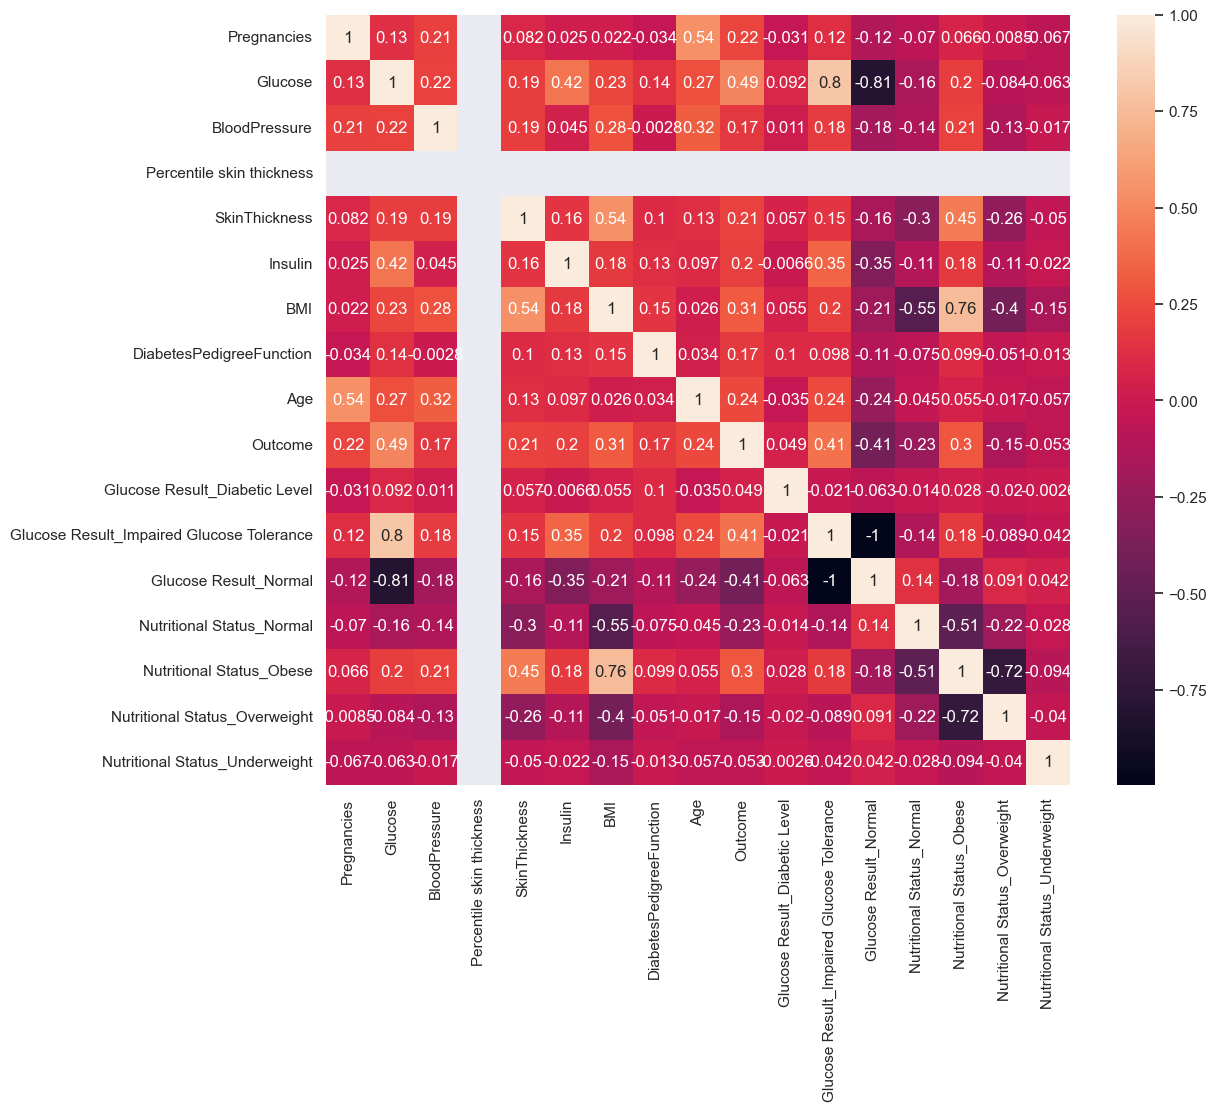

In [71]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot = True)

In [72]:
df1.columns

df1.head();

X = df1.drop(columns=['Outcome', 'Glucose Result', 'Percentile skin thickness', 'Nutritional Status'], axis=1)
Y = df1['Outcome']

X.head();

Y.head();


In [73]:
scaler = StandardScaler()

scaler.fit(X)

standardized_data = scaler.transform(X)

print(standardized_data)

X_sc = standardized_data

print(X_sc)

[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]
[[ 0.63994726  0.86510807 -0.03351824 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20616153 -0.52985903 ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.0158134  -0.69530596 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.0225789  -0.03351824 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14180757 -1.02619983 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94314317 -0.19896517 ... -0.29912651 -0.47378505
  -0.87137393]]


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sc,Y, test_size = 0.2, stratify=Y, random_state=2)

print(X_sc.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [75]:
## K Neighbor Classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)

#training the support vector Machine Classifier
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [76]:
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8192182410423453


In [77]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.6948051948051948


In [78]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[86 14]
 [33 21]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       100
           1       0.60      0.39      0.47        54

    accuracy                           0.69       154
   macro avg       0.66      0.62      0.63       154
weighted avg       0.68      0.69      0.68       154



In [79]:
classifier = svm.SVC(kernel='linear')


In [80]:
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [81]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [82]:
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7801302931596091


In [83]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [84]:
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7662337662337663


In [85]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))


[[91  9]
 [27 27]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [86]:
"""## Decision Tree"""

dtree = DecisionTreeClassifier()

dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [87]:
# accuracy score on the training data
X_train_prediction = dtree.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [88]:
# accuracy score on the test data
X_test_prediction = dtree.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [89]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6883116883116883


In [90]:

print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[81 19]
 [29 25]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       100
           1       0.57      0.46      0.51        54

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154



In [91]:
"""## RandomForest"""

rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [92]:
# accuracy score on the test data
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [93]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7207792207792207


In [94]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))


[[84 16]
 [27 27]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [95]:
""" ## XgBoost"""

xgb_model = XGBClassifier(gamma=0)

xgb_model.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = xgb_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  1.0


In [96]:
# accuracy score on the test data
X_test_prediction = xgb_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7532467532467533


In [97]:
print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))

[[81 19]
 [19 35]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [99]:
"""**SVM is the best model for this prediction since it has an accuracy_score of 0.76.** """


'**SVM is the best model for this prediction since it has an accuracy_score of 0.76.** '

In [101]:

# Define KFold
kf = KFold(n_splits=10, shuffle=False, random_state=None)

skf = StratifiedKFold(n_splits=10, random_state=None)

classifier = svm.SVC(kernel='linear')
classifier = SVC(kernel='linear')  # or any other kernel, but here we need linear

rfecv = RFECV (estimator=classifier,step=1, cv=skf, scoring='accuracy')

rfecv.fit(X,Y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [102]:
feature_names = X.columns[:10]
feature_names

X1 = X[feature_names]

new_features = list(filter(lambda x: x[1],zip(feature_names, rfecv.support_)))
new_features

[('Pregnancies', True),
 ('Glucose', True),
 ('SkinThickness', True),
 ('BMI', True),
 ('DiabetesPedigreeFunction', True)]

In [103]:
X_new = df1[['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin']]

scaler.fit(X_new)

standardized_data = scaler.transform(X_new)

Xnew_sc = standardized_data

Xnew_sc

X_train, X_test, Y_train, Y_test = train_test_split(Xnew_sc,Y, test_size = 0.2, stratify=Y, random_state=2)

print(Xnew_sc.shape, X_train.shape, X_test.shape)

classifier = svm.SVC(kernel='linear',probability=True)


(768, 5) (614, 5) (154, 5)


In [104]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.744299674267101


In [105]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7467532467532467


In [106]:
"""### Evaluation:"""

print(confusion_matrix(Y_test,X_test_prediction ))
print(classification_report(Y_test, X_test_prediction))


[[91  9]
 [30 24]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.73      0.44      0.55        54

    accuracy                           0.75       154
   macro avg       0.74      0.68      0.69       154
weighted avg       0.74      0.75      0.73       154



ROC AUC Score: 0.78


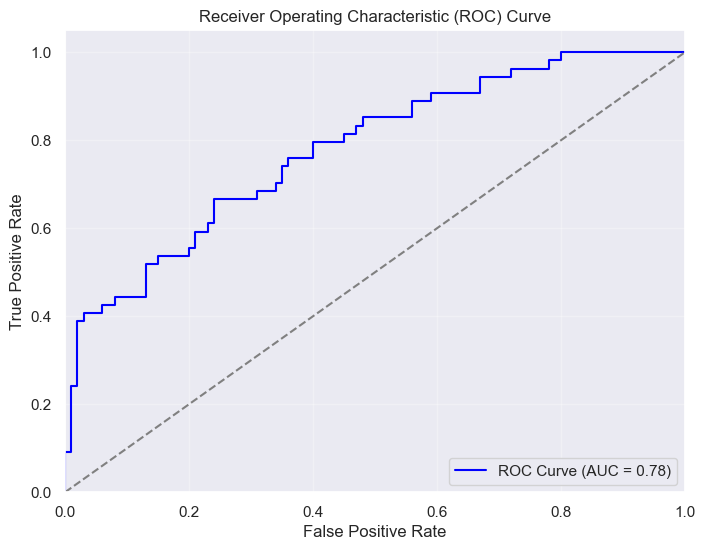

In [127]:
"""### ROC Curve

ROC AUC is a performance metric that measures the area under the ROC curve. It provides a single scalar value that represents the model's ability to discriminate between positive and negative classes across different thresholds. A value closer to 1 indicates better discrimination, while a value of 0.5 suggests random guessing.
"""

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, out_pred_prob)

# Calculate ROC AUC score
ras = roc_auc_score(Y_test, out_pred_prob)
print(f'ROC AUC Score: {ras:.2f}')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {ras:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


In [108]:
precision, recall, thresholds = precision_recall_curve(Y_test, out_pred_prob)
aps = average_precision_score(Y_test, out_pred_prob)
aps

0.7023245782396921

In [109]:
input_data = (5,100,100,19,1000)
print(scaler.n_features_in_)  # This will tell you the number of features the scaler expects.

5


In [110]:
input_data_as_numpy_array = np.asarray(input_data)


In [111]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [112]:
std_data = scaler.transform(input_data_reshaped)
print(std_data)


[[ 0.3429808  -0.7130021   2.2827388  -1.15054099  9.95436065]]


In [113]:
prediction = classifier.predict(std_data)
print(prediction)

[0]


In [114]:
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

"""### Saving Model"""

import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(classifier, file)



The person is not diabetic


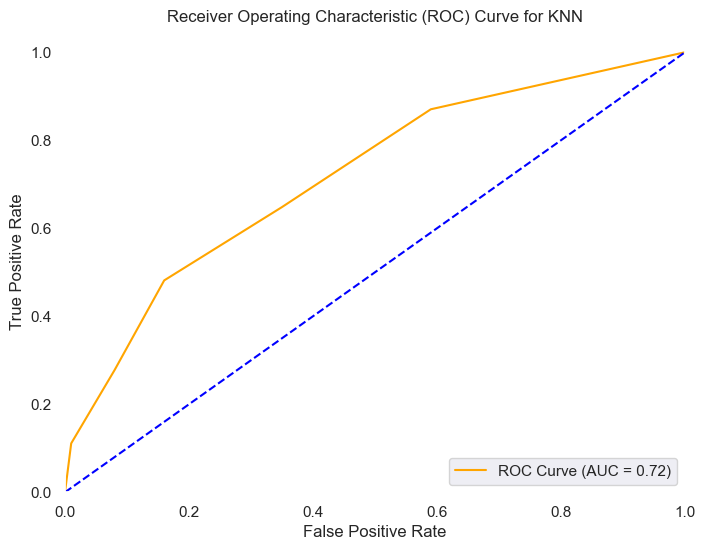

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Training the K Neighbors Classifier
knn.fit(X_train, Y_train)

# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, out_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, out_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.grid(False)
plt.gca().set_facecolor('none')  # Set transparent background
plt.show()


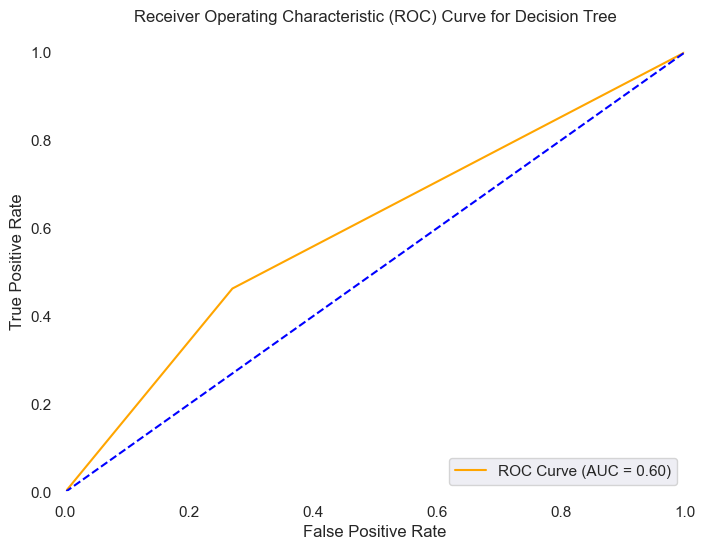

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Training the Decision Tree Classifier
dtree.fit(X_train, Y_train)

# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = dtree.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, out_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, out_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(False)
plt.gca().set_facecolor('none')  # Set transparent background
plt.show()


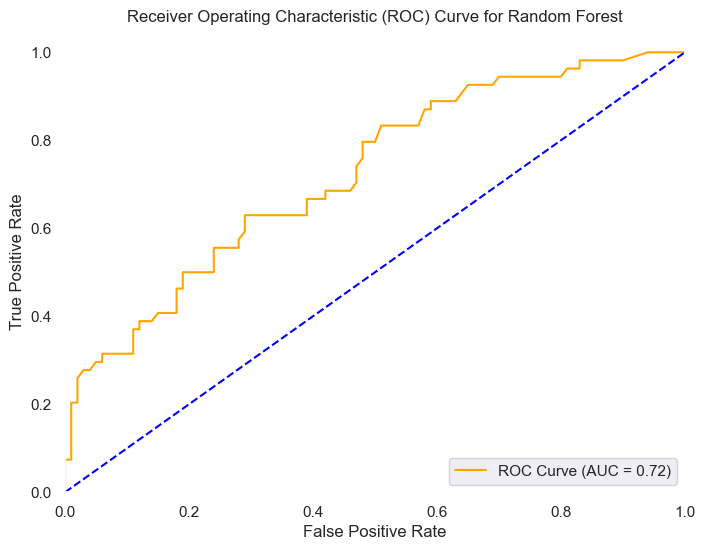

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Training the Random Forest Classifier
rfc.fit(X_train, Y_train)

# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = rfc.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, out_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, out_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(False)
plt.gca().set_facecolor('none')  # Set transparent background
plt.show()


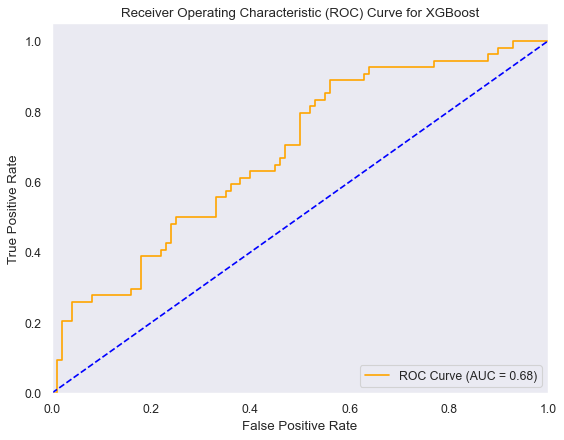

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Training the XGBoost Classifier
xgb_model.fit(X_train, Y_train)

# Obtain predicted probabilities for the positive class (class 1)
out_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, out_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test, out_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6), dpi=80, facecolor='none')  # Transparent background
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()
